In [37]:
import os

import analysis_plotting_helper_functions_c3v3 as helper
import session_processing_helper_c5v2 as processing_helper
import analysis_utils as utils
import utils_c5v2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [38]:
data_dir = '/Users/rebekahzhang/data/behavior_data'
exp = "exp2"
cohort = "cohort_5"
data_folder = os.path.join(data_dir, exp, cohort)
figure_folder = os.path.join(data_dir, exp, f'{cohort}_figures')
print(data_folder)
print(figure_folder)

/Users/rebekahzhang/data/behavior_data/exp2/cohort_5
/Users/rebekahzhang/data/behavior_data/exp2/cohort_5_figures


In [39]:
# two_colors = plt.cm.viridis(np.linspace(0, 1, 2))
two_colors = ["#ffb400", "#9080ff"]
custom_palette = {'s': two_colors[0], 'l': two_colors[1]}

In [40]:
colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", 
          "#beb9db", "#fdcce5", "#8bd3c7", "#96c3d6", "#c4d7a7", "#d1b9d9",
          "#ffcc00"]

# hard coding to merge two session logs from before and after code change
loading logs generated for periods before code change and after code change, concating, regenerating session number, then saving 

In [41]:
sessions_pre = utils_c5v2.load_data(os.path.join(data_folder, 'sessions_training_pre.csv'))
sessions_post = utils_c5v2.load_data(os.path.join(data_folder, 'sessions_training_post.csv'))

In [42]:
sessions_training = pd.concat([sessions_pre, sessions_post])

In [43]:
sessions_training = sessions_training.groupby('mouse', group_keys=False).apply(processing_helper.assign_session_numbers)
sessions_training = sessions_training.sort_values('dir')

In [44]:
sessions_training

,mouse,date,time,exp,training,rig,pump_ul_per_turn,avg_tw,dir,group,session,num_blocks,num_trials,rewards,session_time,trainer,record,ending_code
0,RZ034,2024-01-30,09-52-34,2,regular,rig2,0.0680,0.47,2024-01-30_09-52-34_RZ034,s,0,1.0,397.0,210.0,2406.21,NaN,NaN,NaN
1,RZ036,2024-01-30,09-55-23,2,regular,rig3,0.0609,0.39,2024-01-30_09-55-23_RZ036,s,0,1.0,664.0,425.0,3601.08,NaN,NaN,NaN
2,RZ037,2024-01-30,10-36-04,2,regular,rig2,0.0680,1.70,2024-01-30_10-36-04_RZ037,l,0,1.0,252.0,370.0,3602.47,NaN,NaN,NaN
3,RZ038,2024-01-30,10-59-43,2,regular,rig3,0.0609,0.75,2024-01-30_10-59-43_RZ038,l,0,1.0,239.0,170.0,3607.86,NaN,NaN,NaN
4,RZ039,2024-01-30,11-40-20,2,regular,rig2,0.0680,1.18,2024-01-30_11-40-20_RZ039,l,0,1.0,245.0,275.0,3610.04,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,RZ038,2024-07-18,15-07-36,2,regular,rig1,NaN,6.60,2024-07-18_15-07-36_RZ038,l,94,1.0,202.0,625.0,3470.67,Rebekah,True,miss
198,RZ039,2024-07-18,17-22-52,2,regular,rig1,NaN,3.01,2024-07-18_17-22-52_RZ039,l,93,1.0,402.0,900.0,4802.43,Rebekah,True,reward
199,RZ037,2024-07-19,11-50-39,2,regular,rig1,NaN,8.24,2024-07-19_11-50-39_RZ037,l,96,1.0,102.0,340.0,1807.97,Rebekah,True,pygame
200,RZ038,2024-07-19,12-38-14,2,regular,rig1,NaN,9.30,2024-07-19_12-38-14_RZ038,l,95,1.0,177.0,505.0,3843.33,Rebekah,True,miss


In [45]:
utils.save_log(sessions_training, data_folder, "sessions_training.csv")

# Session based plotting

### load session log

In [46]:
sessions_training = pd.read_csv(os.path.join(data_folder, 'sessions_training.csv'))

In [47]:
sessions_training

,mouse,date,time,exp,training,rig,pump_ul_per_turn,avg_tw,dir,group,session,num_blocks,num_trials,rewards,session_time,trainer,record,ending_code
0,RZ034,2024-01-30,09-52-34,2,regular,rig2,0.0680,0.47,2024-01-30_09-52-34_RZ034,s,0,1.0,397.0,210.0,2406.21,NaN,NaN,NaN
1,RZ036,2024-01-30,09-55-23,2,regular,rig3,0.0609,0.39,2024-01-30_09-55-23_RZ036,s,0,1.0,664.0,425.0,3601.08,NaN,NaN,NaN
2,RZ037,2024-01-30,10-36-04,2,regular,rig2,0.0680,1.70,2024-01-30_10-36-04_RZ037,l,0,1.0,252.0,370.0,3602.47,NaN,NaN,NaN
3,RZ038,2024-01-30,10-59-43,2,regular,rig3,0.0609,0.75,2024-01-30_10-59-43_RZ038,l,0,1.0,239.0,170.0,3607.86,NaN,NaN,NaN
4,RZ039,2024-01-30,11-40-20,2,regular,rig2,0.0680,1.18,2024-01-30_11-40-20_RZ039,l,0,1.0,245.0,275.0,3610.04,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,RZ038,2024-07-18,15-07-36,2,regular,rig1,NaN,6.60,2024-07-18_15-07-36_RZ038,l,94,1.0,202.0,625.0,3470.67,Rebekah,True,miss
484,RZ039,2024-07-18,17-22-52,2,regular,rig1,NaN,3.01,2024-07-18_17-22-52_RZ039,l,93,1.0,402.0,900.0,4802.43,Rebekah,True,reward
485,RZ037,2024-07-19,11-50-39,2,regular,rig1,NaN,8.24,2024-07-19_11-50-39_RZ037,l,96,1.0,102.0,340.0,1807.97,Rebekah,True,pygame
486,RZ038,2024-07-19,12-38-14,2,regular,rig1,NaN,9.30,2024-07-19_12-38-14_RZ038,l,95,1.0,177.0,505.0,3843.33,Rebekah,True,miss


make mouse list

In [48]:
mouse_list = utils_c5v2.generate_mouse_list(sessions_training)
# mouse_list = ['RZ047','RZ049','RZ050','RZ051','RZ052','RZ053','RZ054','RZ055','RZ056']
# mouse_list = ['RZ047','RZ050','RZ051','RZ052','RZ053','RZ054','RZ055','RZ056']
print(mouse_list)

['RZ034', 'RZ036', 'RZ037', 'RZ038', 'RZ039']


In [49]:
cohort_group = {"s": ['RZ034', 'RZ036'], 
          "l": ['RZ037', 'RZ038', 'RZ039']}
# cohort_group = {"s": ['RZ047', 'RZ050', 'RZ051'], 
#           "l": ['RZ052', 'RZ053', 'RZ054', 'RZ055', 'RZ056']}

In [50]:
mouse_list

['RZ034', 'RZ036', 'RZ037', 'RZ038', 'RZ039']

### Plotting functions
should be moved to helper

In [51]:
def plot_each_mouse_per_line(data_df, column_name, plot_name, title, x_label, y_label, 
                             figure_folder=figure_folder, mouse_list=mouse_list):
    fig = plt.figure()
    for i, mouse in enumerate(mouse_list):
        session_mouse = data_df.loc[data_df.mouse == mouse]
        plt.plot(session_mouse.session, session_mouse[column_name], color=colors[i], label=mouse)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
    fig.savefig(f'{figure_folder}/{plot_name}.png', bbox_inches='tight')

In [52]:
def plot_overdays_colored_by_group(data_df, column_name, plot_name, title, x_label, y_label, 
                                   figure_folder=figure_folder, color_palette=custom_palette):
    fig = plt.figure()
    sns.lineplot(x="session",
                 y=column_name,
                 hue="group",
                 data=data_df,
                 palette=color_palette)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # plt.ylim(1,4)
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
    fig.savefig(f'{figure_folder}/{plot_name}.png', bbox_inches='tight')

# Plot type of trials per session

### generate trial type df for plotting
Calculate proportions of trials types and generate trial type df

In [53]:
sessions_training

,mouse,date,time,exp,training,rig,pump_ul_per_turn,avg_tw,dir,group,session,num_blocks,num_trials,rewards,session_time,trainer,record,ending_code
0,RZ034,2024-01-30,09-52-34,2,regular,rig2,0.0680,0.47,2024-01-30_09-52-34_RZ034,s,0,1.0,397.0,210.0,2406.21,NaN,NaN,NaN
1,RZ036,2024-01-30,09-55-23,2,regular,rig3,0.0609,0.39,2024-01-30_09-55-23_RZ036,s,0,1.0,664.0,425.0,3601.08,NaN,NaN,NaN
2,RZ037,2024-01-30,10-36-04,2,regular,rig2,0.0680,1.70,2024-01-30_10-36-04_RZ037,l,0,1.0,252.0,370.0,3602.47,NaN,NaN,NaN
3,RZ038,2024-01-30,10-59-43,2,regular,rig3,0.0609,0.75,2024-01-30_10-59-43_RZ038,l,0,1.0,239.0,170.0,3607.86,NaN,NaN,NaN
4,RZ039,2024-01-30,11-40-20,2,regular,rig2,0.0680,1.18,2024-01-30_11-40-20_RZ039,l,0,1.0,245.0,275.0,3610.04,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,RZ038,2024-07-18,15-07-36,2,regular,rig1,NaN,6.60,2024-07-18_15-07-36_RZ038,l,94,1.0,202.0,625.0,3470.67,Rebekah,True,miss
484,RZ039,2024-07-18,17-22-52,2,regular,rig1,NaN,3.01,2024-07-18_17-22-52_RZ039,l,93,1.0,402.0,900.0,4802.43,Rebekah,True,reward
485,RZ037,2024-07-19,11-50-39,2,regular,rig1,NaN,8.24,2024-07-19_11-50-39_RZ037,l,96,1.0,102.0,340.0,1807.97,Rebekah,True,pygame
486,RZ038,2024-07-19,12-38-14,2,regular,rig1,NaN,9.30,2024-07-19_12-38-14_RZ038,l,95,1.0,177.0,505.0,3843.33,Rebekah,True,miss


In [54]:
def generate_trial_type_df(training_session_log):
    for _, session_info in training_session_log.iterrows():
        all_trials = utils_c5v2.load_data(utils_c5v2.generate_trials_analyzed_path(data_folder, session_info))
        session_performance = helper.get_session_performance(all_trials)
        training_session_log.loc[training_session_log.dir == session_info['dir'], 
                                    ['miss_trials', 'good_trials']] = session_performance
    trial_type_df = training_session_log[['mouse', 'group', 'session', 'num_trials', 
                                            'miss_trials', 'good_trials']].copy()
    trial_type_df['p_miss'] = trial_type_df.miss_trials/trial_type_df.num_trials
    trial_type_df['p_good'] = trial_type_df.good_trials/trial_type_df.num_trials
    trial_type_df['p_accident'] = 1 - trial_type_df.p_good - trial_type_df.p_miss 
    return trial_type_df

########## currently debugging this portion ###############

In [55]:
trial_type_df = generate_trial_type_df(sessions_training)

### trial type combined plot

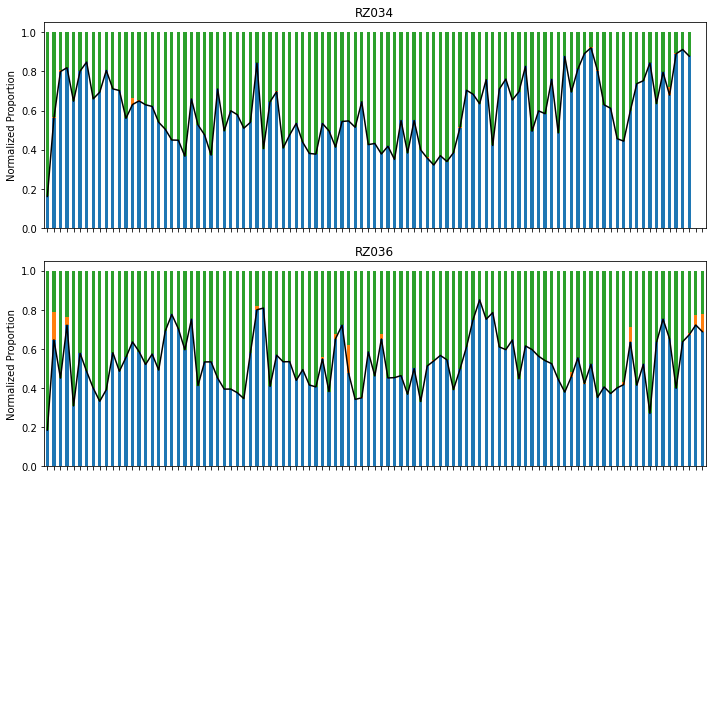

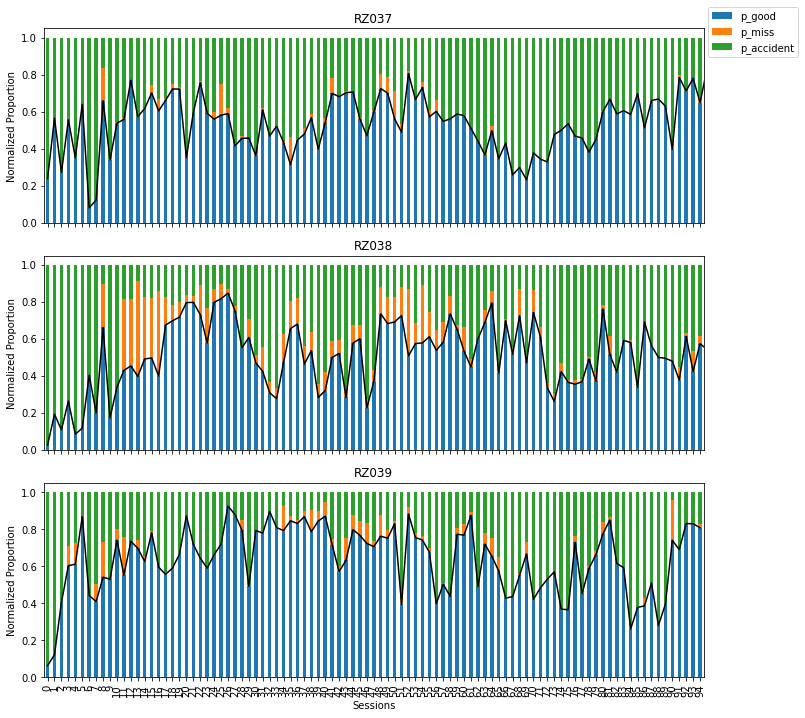

In [56]:
for group, mice in cohort_group.items():
  fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

  for i, mouse in enumerate(mice):
    session_mouse = trial_type_df.loc[(trial_type_df.mouse == mouse) & (trial_type_df.group == group)]
    to_plot = session_mouse.loc[:, ['session', 'p_good', 'p_miss', 'p_accident']]
    ax = axs.flat[i]
    to_plot.plot.bar(x='session', stacked=True, ax=ax, legend=None)
    ax.set_title(mouse)
    ax.set_xlabel('Sessions')
    ax.set_ylabel('Normalized Proportion')
    ax.plot(to_plot.session, to_plot.p_good, color='k', linewidth=1.5)
  
  if group == "l":
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.12, 1))
  if group == "s" and len(mice) < 5:
    axs.flat[-1].axis('off')
  plt.tight_layout()
  plt.savefig(f'{figure_folder}/engagement_plots_{group}.png', bbox_inches='tight')

### percentage good trials

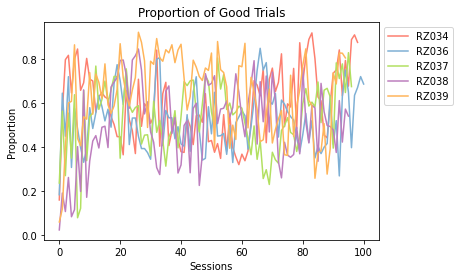

In [58]:
# plot the proportion of good trials
plot_each_mouse_per_line(data_df=trial_type_df, 
                         column_name='p_good', 
                         plot_name="%_good_trials", 
                         title='Proportion of Good Trials',
                         x_label='Sessions', 
                         y_label='Proportion')

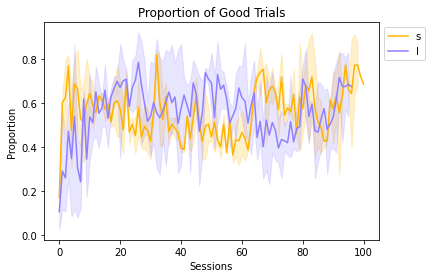

In [59]:
plot_overdays_colored_by_group(data_df=trial_type_df, 
                               column_name="p_good", 
                               plot_name='%_good_trials_by_group', 
                               title='Proportion of Good Trials', 
                               x_label='Sessions', 
                               y_label='Proportion')

### Percent missed trials

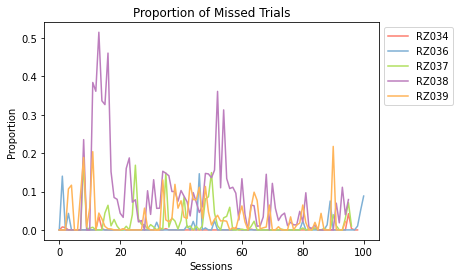

In [60]:
# plot the proportion of miss trials
plot_each_mouse_per_line(data_df=trial_type_df, 
                         column_name='p_miss', 
                         plot_name="%_miss_trials",
                         title='Proportion of Missed Trials', 
                         x_label='Sessions', 
                         y_label='Proportion')

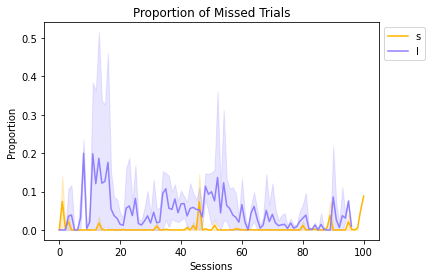

In [61]:
plot_overdays_colored_by_group(data_df=trial_type_df, 
                               column_name="p_miss", 
                               plot_name='%_miss_trials_by_group', 
                               title='Proportion of Missed Trials', 
                               x_label='Sessions', 
                               y_label='Proportion')

### Percent accident trials

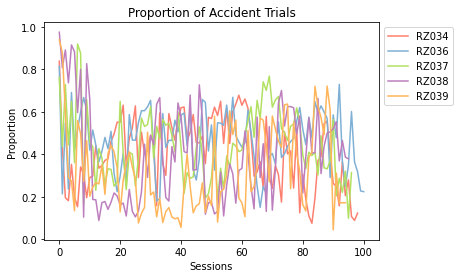

In [62]:
# plot the proportion of accident trials
plot_each_mouse_per_line(data_df=trial_type_df, 
                         column_name='p_accident', 
                         plot_name="%_accident_trials", 
                         title='Proportion of Accident Trials',
                         x_label='Sessions', 
                         y_label='Proportion')

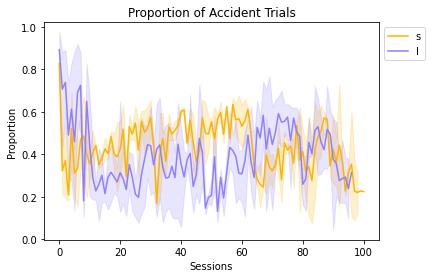

In [63]:
plot_overdays_colored_by_group(data_df=trial_type_df, 
                               column_name="p_accident", 
                               plot_name='%_accident_trials_by_group', 
                               title='Proportion of Accident Trials', 
                               x_label='Sessions', 
                               y_label='Proportion')

# Plot rewards per session

### add info to training session log for plotting

In [64]:
def generate_reward_df(sessions):

    reward_df = sessions[['mouse', 'group', 'session', 'num_trials', 
                                            'rewards', 'session_time']].copy()
    reward_df['reward_rate'] = reward_df.rewards/reward_df.session_time
    reward_df['reward_per_trial'] = reward_df.rewards/reward_df.num_trials
    reward_df['num_trials_rewarded'] = reward_df.rewards/5
    reward_df['%_trials_rewarded'] = reward_df.num_trials_rewarded/reward_df.num_trials

    return reward_df

In [65]:
rewards_df = generate_reward_df(sessions_training)

### plot % rewarded trials

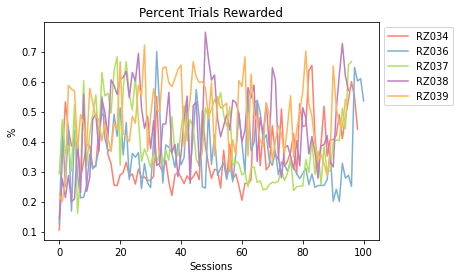

In [66]:
plot_each_mouse_per_line(data_df=rewards_df, 
                         column_name='%_trials_rewarded', 
                         plot_name="%_trials_rewarded",
                         title='Percent Trials Rewarded', 
                         x_label='Sessions', 
                         y_label='%')

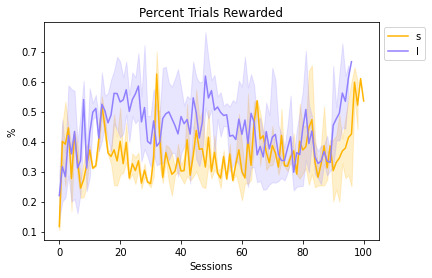

In [67]:
plot_overdays_colored_by_group(data_df=rewards_df, 
                               column_name="%_trials_rewarded", 
                               plot_name='%_trials_rewarded_by_group', 
                               title='Percent Trials Rewarded', 
                               x_label='Sessions', 
                               y_label='%')

### Plot reward rate

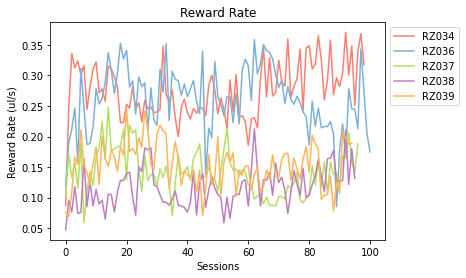

In [68]:
# plot the reward rate
plot_each_mouse_per_line(data_df=rewards_df, 
                         column_name='reward_rate', 
                         plot_name="reward_rate",
                         title='Reward Rate', 
                         x_label='Sessions', 
                         y_label='Reward Rate (ul/s)')

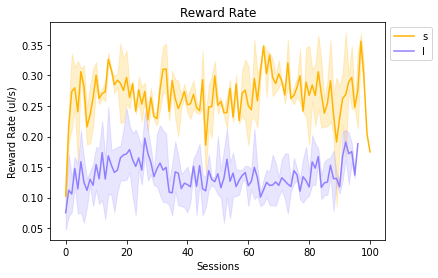

In [69]:
plot_overdays_colored_by_group(data_df=rewards_df, 
                               column_name="reward_rate", 
                               plot_name='reward_rate_by_group', 
                               title='Reward Rate', 
                               x_label='Sessions', 
                               y_label='Reward Rate (ul/s)')

### Plot session length

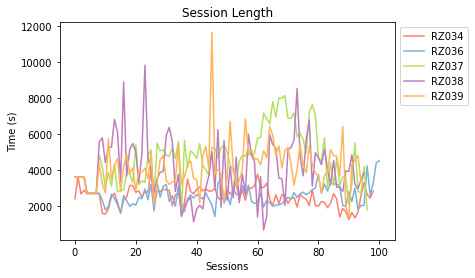

In [70]:
# plot the session length
plot_each_mouse_per_line(data_df=rewards_df, 
                         column_name='session_time', 
                         plot_name="session_length", 
                         title='Session Length',
                         x_label='Sessions', 
                         y_label='Time (s)')

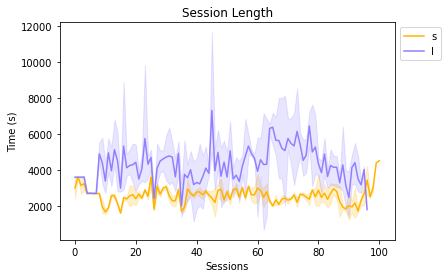

In [71]:
plot_overdays_colored_by_group(data_df=rewards_df, 
                               column_name="session_time", 
                               plot_name='session_length_by_group', 
                               title='Session Length', 
                               x_label='Sessions', 
                               y_label='Time (s)')

### plot num trials completed

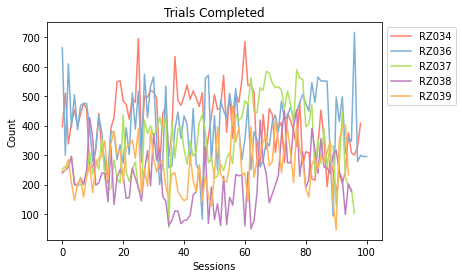

In [72]:
# plot the number of trials completed
plot_each_mouse_per_line(data_df=rewards_df, 
                         column_name='num_trials', 
                         plot_name="num_trials", 
                         title='Trials Completed',
                         x_label='Sessions', 
                         y_label='Count')

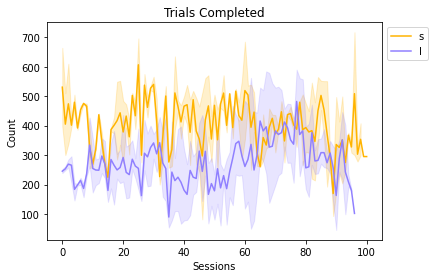

In [73]:
plot_overdays_colored_by_group(data_df=rewards_df, 
                               column_name="num_trials", 
                               plot_name='num_trials_by_group', 
                               title='Trials Completed', 
                               x_label='Sessions', 
                               y_label='Count')

# Plot background behavior

### generate mistake df for plotting

In [74]:
def get_session_mistakes(all_trials):
    all_trials['bg_repeats'] -= 1
    num_bg_repeats_mean = all_trials.bg_repeats.mean()
    num_bg_repeats_med = all_trials.bg_repeats.median()
    num_bg_repeats_std = all_trials.bg_repeats.std()
    num_bg_repeats_rate_mean = num_bg_repeats_mean/all_trials.bg_length.mean()
    return [num_bg_repeats_mean, num_bg_repeats_med, num_bg_repeats_std, num_bg_repeats_rate_mean]

In [77]:
def generate_mistake_df(training_session_log):
    mistake_df = training_session_log[['mouse', 'session', 'dir', 'group']].copy()

    for _, session_info in training_session_log.iterrows():
        all_trials = utils_c5v2.load_data(utils_c5v2.generate_trials_analyzed_path(data_folder, session_info))
        # time waited for all trials
        session_mistakes = get_session_mistakes(all_trials)
        mistake_df.loc[mistake_df.dir == session_info['dir'], 
                                ['num_bg_repeats_mean', 'num_bg_repeats_med', 
                                 'num_bg_repeats_std', 'num_bg_repeats_rate_mean']] = session_mistakes
    return mistake_df

In [78]:
mistakes_df = generate_mistake_df(sessions_training)

### plot number of mistakes per trial

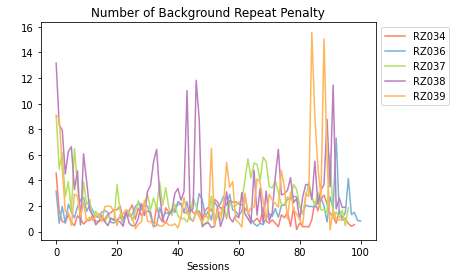

In [79]:
plot_each_mouse_per_line(data_df=mistakes_df, 
                         column_name='num_bg_repeats_mean', 
                         plot_name="num_bg_repeats_mean", 
                         title='Number of Background Repeat Penalty',
                         x_label='Sessions', 
                         y_label=' ')

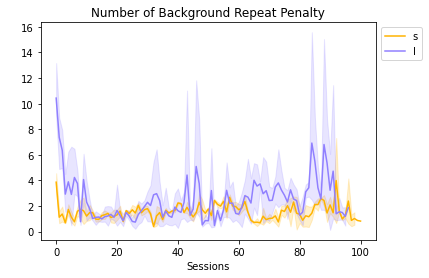

In [80]:
plot_overdays_colored_by_group(data_df=mistakes_df, 
                               column_name="num_bg_repeats_mean", 
                               plot_name='num_bg_repeats_mean_by_group', 
                               title='Number of Background Repeat Penalty', 
                               x_label='Sessions', 
                               y_label=' ')

### plot mistake rate

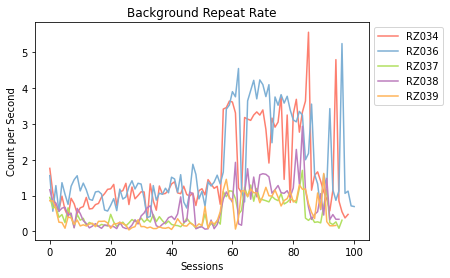

In [81]:
plot_each_mouse_per_line(data_df=mistakes_df, 
                         column_name='num_bg_repeats_rate_mean', 
                         plot_name="num_bg_repeats_rate_mean", 
                         title='Background Repeat Rate',
                         x_label='Sessions', 
                         y_label='Count per Second')

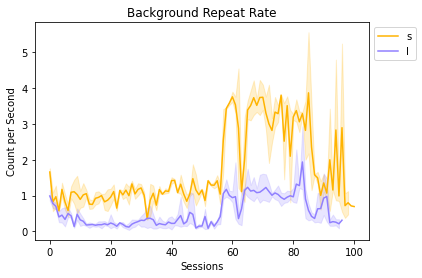

In [82]:
plot_overdays_colored_by_group(data_df=mistakes_df, 
                               column_name="num_bg_repeats_rate_mean", 
                               plot_name='num_bg_repeats_rate_mean_by_group', 
                               title='Background Repeat Rate', 
                               x_label='Sessions', 
                               y_label='Count per Second')

# Plot time wait behavior

### generate wait df for plotting

In [85]:
def generate_wait_df(training_session_log):
    wait_df = training_session_log[['mouse', 'session', 'dir', 'group']].copy()

    for _, session_info in training_session_log.iterrows():
        all_trials = utils_c5v2.load_data(utils_c5v2.generate_trials_analyzed_path(data_folder, session_info))
        # time waited for all trials
        session_tw = helper.get_session_tw(all_trials)
        wait_df.loc[wait_df.dir == session_info['dir'], 
                                ['tw_mean', 'tw_median', 'tw_stdev']] = session_tw

        good_trials = utils.select_good_trials(all_trials)
         # time waited for good trials
        session_tw_g = helper.get_session_tw(good_trials)
        wait_df.loc[wait_df.dir == session_info['dir'], 
                                ['tw_mean_g', 'tw_median_g', 'tw_stdev_g']] = session_tw_g
    return wait_df

In [86]:
wait_df = generate_wait_df(sessions_training)

### plot time watied

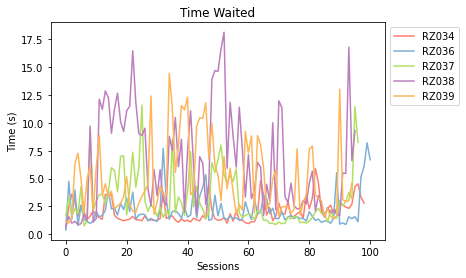

In [87]:
# plot the time waited over days. 
plot_each_mouse_per_line(data_df=wait_df, 
                         column_name='tw_mean', 
                         plot_name="tw_mean", 
                         title='Time Waited',
                         x_label='Sessions', 
                         y_label='Time (s)')

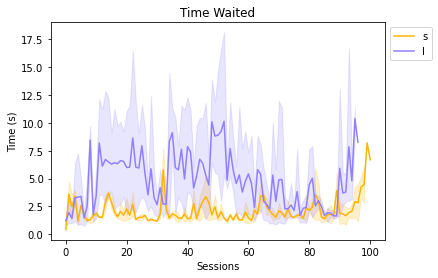

In [88]:
plot_overdays_colored_by_group(data_df=wait_df, 
                               column_name="tw_mean", 
                               plot_name='tw_mean_by_group', 
                               title='Time Waited', 
                               x_label='Sessions', 
                               y_label='Time (s)')

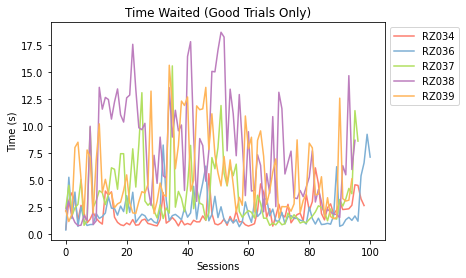

In [89]:
# plot the time waited over days good trials only. 
plot_each_mouse_per_line(data_df=wait_df, 
                         column_name='tw_mean_g', 
                         plot_name="tw_mean_g", 
                         title='Time Waited (Good Trials Only)',
                         x_label='Sessions', 
                         y_label='Time (s)')

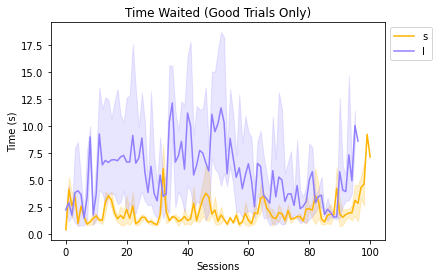

In [90]:
plot_overdays_colored_by_group(data_df=wait_df, 
                               column_name="tw_mean_g", 
                               plot_name='tw_mean_g_by_group', 
                               title='Time Waited (Good Trials Only)', 
                               x_label='Sessions', 
                               y_label='Time (s)')

## some stats

all sessions tw difference

In [91]:
sessions_training

,mouse,date,time,exp,training,rig,pump_ul_per_turn,avg_tw,dir,group,session,num_blocks,num_trials,rewards,session_time,trainer,record,ending_code,miss_trials,good_trials
0,RZ034,2024-01-30,09-52-34,2,regular,rig2,0.0680,0.47,2024-01-30_09-52-34_RZ034,s,0,1.0,397.0,210.0,2406.21,NaN,NaN,NaN,0.0,64.0
1,RZ036,2024-01-30,09-55-23,2,regular,rig3,0.0609,0.39,2024-01-30_09-55-23_RZ036,s,0,1.0,664.0,425.0,3601.08,NaN,NaN,NaN,0.0,123.0
2,RZ037,2024-01-30,10-36-04,2,regular,rig2,0.0680,1.70,2024-01-30_10-36-04_RZ037,l,0,1.0,252.0,370.0,3602.47,NaN,NaN,NaN,0.0,60.0
3,RZ038,2024-01-30,10-59-43,2,regular,rig3,0.0609,0.75,2024-01-30_10-59-43_RZ038,l,0,1.0,239.0,170.0,3607.86,NaN,NaN,NaN,0.0,6.0
4,RZ039,2024-01-30,11-40-20,2,regular,rig2,0.0680,1.18,2024-01-30_11-40-20_RZ039,l,0,1.0,245.0,275.0,3610.04,NaN,NaN,NaN,0.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,RZ038,2024-07-18,15-07-36,2,regular,rig1,NaN,6.60,2024-07-18_15-07-36_RZ038,l,94,1.0,202.0,625.0,3470.67,Rebekah,True,miss,8.0,116.0
484,RZ039,2024-07-18,17-22-52,2,regular,rig1,NaN,3.01,2024-07-18_17-22-52_RZ039,l,93,1.0,402.0,900.0,4802.43,Rebekah,True,reward,0.0,333.0
485,RZ037,2024-07-19,11-50-39,2,regular,rig1,NaN,8.24,2024-07-19_11-50-39_RZ037,l,96,1.0,102.0,340.0,1807.97,Rebekah,True,pygame,1.0,69.0
486,RZ038,2024-07-19,12-38-14,2,regular,rig1,NaN,9.30,2024-07-19_12-38-14_RZ038,l,95,1.0,177.0,505.0,3843.33,Rebekah,True,miss,14.0,96.0


In [92]:
short = wait_df[wait_df['group']=='s']
long = wait_df[wait_df['group']=='l']

print(short.tw_mean.mean())
print(long.tw_mean.mean())

#perform independent two sample t-test
stats.ttest_ind(short['tw_mean'], long['tw_mean'])

2.108157510346766
4.865222116215588


Ttest_indResult(statistic=-10.10268845786979, pvalue=6.560174473534363e-22)

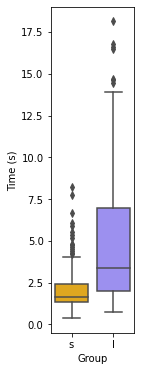

In [93]:
plt.figure(figsize=(1.5, 6))
sns.boxplot(data=wait_df, x="group", y="tw_mean", palette=custom_palette)
plt.ylabel("Time (s)")
plt.xlabel("Group")
plt.savefig(f'{figure_folder}/{"tw_box"}.png', bbox_inches='tight')

by days sessions tw difference

In [94]:
def generate_p_val_df(wait_df, group_col_name):
    result_list = []
    for num, data in wait_df.groupby(group_col_name):
        short = data[data['group']=='s']
        long = data[data['group']=='l']
        s_tw = short.tw_mean.mean()
        l_tw = long.tw_mean.mean()

        # Perform t-test
        ttest = stats.ttest_ind(short['tw_mean'], long['tw_mean'])
        p_val_t = ttest[1]

        # Perform Mann-Whitney U test
        u_test = stats.mannwhitneyu(short['tw_mean'], long['tw_mean'])
        p_val_u = u_test[1]

        result_list.append([num, s_tw, l_tw, p_val_t, p_val_u])

    return pd.DataFrame(result_list, columns=["num", "s_tw", "l_tw", "p_val_t", "p_val_u"])

In [95]:
# tw_stats_by_session = generate_p_val_df(wait_df, "session")

In [96]:
# tw_stats_by_session[tw_stats_by_session['p_val_t'] < 0.05]

plot waiting df in 10 day intervals

In [97]:
wait_df['period'] = wait_df['session']//10 #add session period in 10 day intervals

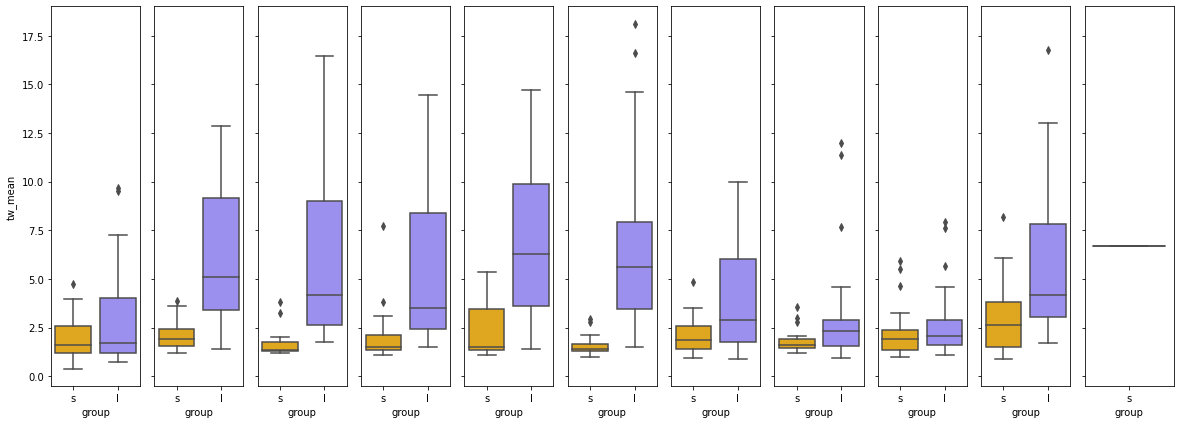

In [98]:
num_subplots = wait_df['period'].max()+1
fig, axs = plt.subplots(1, num_subplots, figsize=(num_subplots*1.5, 6), sharey=True)
for p, period_data in wait_df.groupby('period'):
    sns.boxplot(data=period_data,
                x="group", 
                y="tw_mean", 
                palette=custom_palette,
                ax=axs.flat[p])
    if p != 0:
        axs.flat[p].set_ylabel("")

plt.tight_layout()
plt.savefig(f'{figure_folder}/tw_box_by_period.png', bbox_inches='tight')

In [99]:
tw_stats_by_period = generate_p_val_df(wait_df, "period")
tw_stats_by_period[tw_stats_by_period['p_val_t'] < 0.05]

ValueError: `x` and `y` must be of nonzero size.

In [ ]:
tw_stats_by_period

## plots to be figured out

In [ ]:
for group, mice in cohort_group.items():
    fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
    for i, mouse in enumerate(mice):
        session_mouse = wait_df.loc[(wait_df.mouse == mouse) & (wait_df.group == group)]
        ax = axs.flat[i]
        ax.errorbar(session_mouse.session, session_mouse.tw_mean, session_mouse.tw_stdev, 
                    linestyle='None', marker='o', color=custom_palette[group], label='mean')
        ax.scatter(session_mouse.session, session_mouse.tw_median, label='median', color='yellowgreen')
        ax.set_title(mouse)
        ax.set_xlabel('Sessions')
        ax.set_ylabel('Time Waited (s)')
        ax.set_ylim([-5, 35])
    
    if group == "s":
        axs.flat[2].axis('off')
        axs.flat[3].axis('off')
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.12, 1))
    plt.tight_layout()
    plt.savefig(f'{figure_folder}/tw_plots_{group}.png', bbox_inches='tight', dpi=300)

In [ ]:
for group, mice in cohort_group.items():
    fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True, sharey=True)
    for i, mouse in enumerate(mice):
        session_mouse = wait_df.loc[(wait_df.mouse == mouse) & (wait_df.group == group)]
        ax = axs.flat[i]
        ax.errorbar(session_mouse.session, session_mouse.tw_mean_g, session_mouse.tw_stdev_g, 
                    linestyle='None', marker='o', color=custom_palette[group], label='mean')
        ax.scatter(session_mouse.session, session_mouse.tw_median_g, label='median', color='yellowgreen')
        ax.set_title(mouse)
        ax.set_xlabel('Sessions')
        ax.set_ylabel('Time Waited (s)')
        ax.set_ylim([-5, 35])
    
    if group == "s":
        axs.flat[2].axis('off')
        # axs.set_ylim(0, 35)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.12, 1))
    plt.tight_layout()
    plt.savefig(f'{figure_folder}/tw_good_plots_{group}.png', bbox_inches='tight', dpi=300)

In [ ]:
def calculate_subplot_row_col(session_mouse, plots_per_row):
    days_trained = len(session_mouse)
    num_rows = (days_trained - 1) // plots_per_row + 1
    num_cols = min(days_trained, plots_per_row)
    return num_rows, num_cols

In [ ]:
for mouse in mouse_list:
    session_mouse = sessions_training.loc[sessions_training.mouse == mouse]
    num_rows, num_cols = calculate_subplot_row_col(session_mouse, 8)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(21.5, 2.5 * num_rows))

    for i, (_, session_info) in enumerate(session_mouse.iterrows()):
        all_trials = utils_c5.load_data(utils_c5.generate_trials_analyzed_path(data_folder, session_info))
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axs[row_idx, col_idx]
        
        sns.scatterplot(x="session_trial_num",
                        y="time_waited",
                        hue="group",
                        data=all_trials,
                        palette=custom_palette,
                        ax=axs.flat[i])
        ax.set_ylim([0,35])
        ax.set_title(f'Session {i}')
        ax.legend().remove()
    
    # Remove any unused subplots
    if i + 1 < num_rows * num_cols:
        for j in range(i + 1, num_rows * num_cols):
            axs.flat[j].axis('off')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the figure with proper spacing around the subplots
    plt.savefig(f'{figure_folder}/trial_num_vs_tw_{mouse}.png', bbox_inches='tight', dpi=300)
    plt.close()

# Stitched all sessions all mice per day

In [ ]:
stitched_folder = os.path.join(data_dir, cohort, exp, 'stitched')
stitched_figure_folder = os.path.join(data_dir, cohort, exp, 'figures')
print(data_folder)
print(figure_folder)

In [ ]:
stitched_log = utils.load_session_log(stitched_folder, f'sessions_training_stitched_{exp}.csv')

In [ ]:
def generate_events_processed_stitched_path(data_folder, session_info):
    filename = f'events_processed_stitched_{session_info.date}.csv'
    return os.path.join(data_folder, f"{session_info.date}", filename)

In [ ]:
def generate_trials_analyzed_stitched_path(data_folder, session_info):
    filename = f'trials_analyzed_stitched_{session_info.date}.csv'
    return os.path.join(data_folder, session_info.date, filename)

In [ ]:
days_trained = len(stitched_log)
num_rows = (days_trained - 1) // 10 + 1
num_cols = min(days_trained, 10)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(2.5*num_cols, 2.5 * num_rows))

for i, (_, session_info) in enumerate(stitched_log.iterrows()):
    all_trials = utils_c5.load_data(generate_trials_analyzed_stitched_path(stitched_folder, session_info))
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axs[row_idx, col_idx]

    sns.kdeplot(data=all_trials.reset_index(drop=True), 
                    x="time_waited", 
                    hue="group",
                    common_norm=False,
                    bw_adjust=0.5, 
                    palette=custom_palette,
                    ax=axs.flat[i])
    
    ax.axvline(x=all_trials.loc[all_trials.group == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
    ax.axvline(x=all_trials.loc[all_trials.group == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
    ax.set_xlim([0, 15])
    ax.set_ylim([0, 0.6])
    ax.set_title(f'Session {i+1}')
    
# Remove any unused subplots
if i + 1 < num_rows * num_cols:
    for j in range(i + 1, num_rows * num_cols):
        axs.flat[j].axis('off')

for i in range(days_trained):
    ax = axs.flat[i]
    ax.get_legend().remove()

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure with proper spacing around the subplots
plt.savefig(f'{stitched_figure_folder}/tw_kde.png', bbox_inches='tight', dpi=300)

In [ ]:
days_trained = len(stitched_log)
num_rows = (days_trained - 1) // 10 + 1
num_cols = min(days_trained, 10)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(2.5*num_cols, 2.5 * num_rows))

for i, (_, session_info) in enumerate(stitched_log.iterrows()):
    all_trials = utils_c5.load_data(generate_trials_analyzed_stitched_path(stitched_folder, session_info))
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axs[row_idx, col_idx]

    sns.ecdfplot(data=all_trials.reset_index(drop=True), 
                    x="time_waited", 
                    hue="group",
                    palette=custom_palette,
                    ax=axs.flat[i])
    
    ax.axvline(x=all_trials.loc[all_trials.group == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
    ax.axvline(x=all_trials.loc[all_trials.group == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
    
    ax.set_xlim([0, 15])
    ax.set_ylim([0, 1.01])
    
    ax.set_title(f'Session {i+1}')
    
# Remove any unused subplots
if i + 1 < num_rows * num_cols:
    for j in range(i + 1, num_rows * num_cols):
        axs.flat[j].axis('off')

for i in range(days_trained):
    ax = axs.flat[i]
    ax.get_legend().remove()

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure with proper spacing around the subplots
plt.savefig(f'{stitched_figure_folder}/tw_cdf.png', bbox_inches='tight', dpi=300)

In [ ]:
def select_non_accident_trials(all_trials):
    non_accident_trials = all_trials[all_trials['time_waited'] > 0.5]
    return non_accident_trials

In [ ]:
days_trained = len(stitched_log)
num_rows = (days_trained - 1) // 10 + 1
num_cols = min(days_trained, 10)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(2.5*num_cols, 2.5 * num_rows))

for i, (_, session_info) in enumerate(stitched_log.iterrows()):
    all_trials = utils_c5.load_data(generate_trials_analyzed_stitched_path(stitched_folder, session_info))
    non_accident_trials = select_non_accident_trials(all_trials)
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axs[row_idx, col_idx]

    sns.kdeplot(data=non_accident_trials.reset_index(drop=True), 
                    x="time_waited", 
                    hue="group",
                    common_norm=False,
                    bw_adjust=0.5, 
                    palette=custom_palette,
                    ax=axs.flat[i])
    
    ax.axvline(x=non_accident_trials.loc[non_accident_trials.group == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
    ax.axvline(x=non_accident_trials.loc[non_accident_trials.group == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
    
    ax.set_xlim([0, 15])
    ax.set_ylim([0, 0.6])
    
    ax.set_title(f'Session {i+1}')

# Remove any unused subplots
if i + 1 < num_rows * num_cols:
    for j in range(i + 1, num_rows * num_cols):
        axs.flat[j].axis('off')

for i in range(days_trained):
    ax = axs.flat[i]
    ax.get_legend().remove()

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure with proper spacing around the subplots
plt.savefig(f'{stitched_figure_folder}/tw_g_kde.png', bbox_inches='tight', dpi=300)

In [ ]:
days_trained = len(stitched_log)
num_rows = (days_trained - 1) // 10 + 1
num_cols = min(days_trained, 10)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(2.5*num_cols, 2.5 * num_rows))

for i, (_, session_info) in enumerate(stitched_log.iterrows()):
    all_trials = utils_c5.load_data(generate_trials_analyzed_stitched_path(stitched_folder, session_info))
    non_accident_trials = select_non_accident_trials(all_trials)
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axs[row_idx, col_idx]

    sns.ecdfplot(data=non_accident_trials.reset_index(drop=True), 
                    x="time_waited", 
                    hue="group",
                    palette=custom_palette,
                    ax=axs.flat[i])
    
    ax.axvline(x=non_accident_trials.loc[non_accident_trials.group == 'l']['time_waited'].mean(), 
               color=custom_palette['l'], linestyle='--')
    ax.axvline(x=non_accident_trials.loc[non_accident_trials.group == 's']['time_waited'].mean(), 
               color=custom_palette['s'], linestyle='--')
    
    ax.set_xlim([0, 15])
    ax.set_ylim([0, 1.01])
    
    ax.set_title(f'Session {i+1}')

# Remove any unused subplots
if i + 1 < num_rows * num_cols:
    for j in range(i + 1, num_rows * num_cols):
        axs.flat[j].axis('off')

for i in range(days_trained):
    ax = axs.flat[i]
    ax.get_legend().remove()

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure with proper spacing around the subplots
plt.savefig(f'{stitched_figure_folder}/tw_g_cdf.png', bbox_inches='tight', dpi=300)